In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img


In [2]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
EPOCHS=64
CHANNELS=3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "imageDataSet",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 135 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['cancer', 'non-cancer']

In [6]:
len(dataset)


5

In [7]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(32, 256, 256, 3)
tf.Tensor(
[[[133.37305     97.37305     81.37305   ]
  [136.16313    100.16313     84.16313   ]
  [141.58879    105.58879     89.58879   ]
  ...
  [209.         194.94531    195.10938   ]
  [210.73438    196.73438    196.73438   ]
  [212.78906    198.78906    198.78906   ]]

 [[134.79985     98.79985     82.79985   ]
  [138.19615    102.19615     86.19615   ]
  [143.70508    107.70508     91.70508   ]
  ...
  [208.9734     194.91872    195.08278   ]
  [210.73438    196.73438    196.73438   ]
  [212.78906    198.78906    198.78906   ]]

 [[136.06145    100.06145     84.06145   ]
  [138.89844    102.89844     86.89844   ]
  [144.26308    108.26308     92.26308   ]
  ...
  [208.94531    194.89062    195.05469   ]
  [210.73438    196.73438    196.73438   ]
  [212.78906    198.78906    198.78906   ]]

 ...

 [[  8.378906     5.3789062    0.37890625]
  [  9.644531     5.3789062    0.25901794]
  [ 16.307404     9.198029     3.143341  ]
  ...
  [182.6436     156.6436     131

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.0, test_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(dataset))

5


In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [44]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)       

In [58]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=64,
)

Epoch 1/64


4/4 [==============================] - 3s 389ms/step - loss: 0.1063 - accuracy: 0.9709
Epoch 2/64
4/4 [==============================] - 2s 442ms/step - loss: 0.0619 - accuracy: 0.9903
Epoch 3/64
4/4 [==============================] - 2s 441ms/step - loss: 0.0595 - accuracy: 0.9709
Epoch 4/64
4/4 [==============================] - 2s 454ms/step - loss: 0.0766 - accuracy: 0.9806
Epoch 5/64
4/4 [==============================] - 2s 389ms/step - loss: 0.0247 - accuracy: 0.9903
Epoch 6/64
4/4 [==============================] - 2s 534ms/step - loss: 0.0365 - accuracy: 0.9903
Epoch 7/64
4/4 [==============================] - 2s 388ms/step - loss: 0.1197 - accuracy: 0.9806
Epoch 8/64
4/4 [==============================] - 2s 386ms/step - loss: 0.0148 - accuracy: 0.9903
Epoch 9/64
4/4 [==============================] - 2s 390ms/step - loss: 0.0699 - accuracy: 0.9806
Epoch 10/64
4/4 [==============================] - 2s 394ms/step - loss: 0.0488 - accuracy: 0.9806
Epoch 11/64
4/4 [=============

In [59]:
model.evaluate(test_ds)

1/1 [==============================] - 0s 321ms/step - loss: 0.3327 - accuracy: 0.9688


[0.33268794417381287, 0.96875]

In [32]:
acc = history.history['accuracy']
loss = history.history['loss']

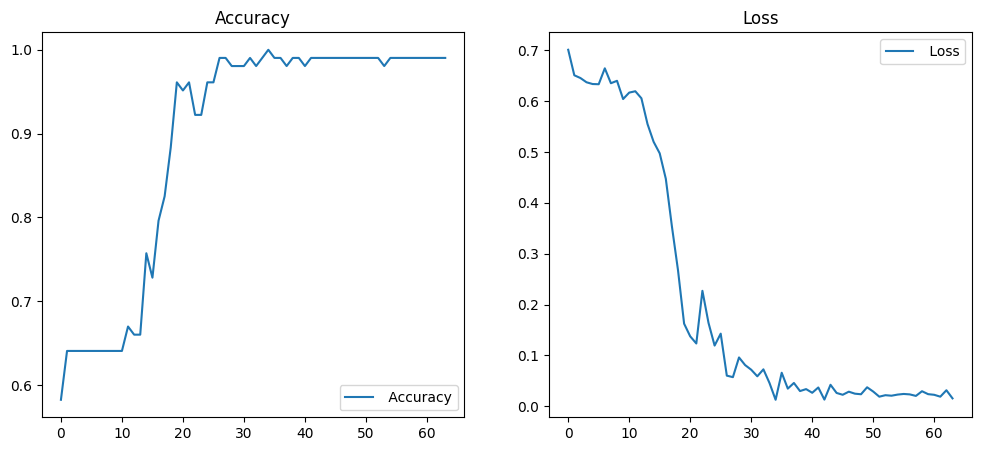

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(range(64), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(64), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [34]:
image_path = "imageDataSet/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)

In [35]:
pred = model.predict(scaled_img)
print(np.argmax(pred))

1/1 [==============================] - 0s 282ms/step
0


In [36]:
output = class_names[np.argmax(pred)]
output

'cancer'

In [37]:
model.save("Oral cancer detection1[img].keras")

In [38]:
from tensorflow.keras.models import load_model
model=load_model('Oral cancer detection1[img].keras')

In [39]:
def predict_class(image_path, model, class_names):
    # Load and preprocess the image
    image = preprocessing.image.load_img(image_path)
    image_array = preprocessing.image.img_to_array(image)
    scaled_img = np.expand_dims(image_array, axis=0)

    # Perform prediction
    pred = model.predict(scaled_img)
    print(np.argmax(pred))
    predicted_class_index = np.argmax(pred)
    class_names=['cancer','non-cancer']
    predicted_class = class_names[predicted_class_index]
    print(class_names)
    output = class_names[np.argmax(pred)]
    return output




In [40]:
image_path = "imageDataSet/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg"
class_names=['cancer','non-cancer']
predicted_class = predict_class(image_path, model, class_names)
print("Predicted class:", predict_class)

1/1 [==============================] - 0s 157ms/step
0
['cancer', 'non-cancer']
Predicted class: <function predict_class at 0x000002C2097A7740>


In [41]:
image_path = "imageDataSet/cancer/cancer_4.jpg"
predicted_class = predict_class(image_path, model, class_names)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 175ms/step
0
['cancer', 'non-cancer']
Predicted class: cancer


In [42]:
import pickle
pickle.dump(model,open('model_2.pkl','wb'))
model = pickle.load(open('model_2.pkl','rb'))